In [2]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
## Cargar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../data/rendimiento_estudiantes_train.csv")

## Vista general
df.head()

,escuela,sexo,edad,entorno,TamFam,EstPadres,Medu,Pedu,Mtrab,Ptrab,...,TiempoLib,SalAm,AlcSem,AlcFin,salud,faltas,asignatura,T1,T2,T3
0,IC,M,19,U,>=4,J,2.0,1.0,casa,otros,...,4,3,1.0,3,5,210.910377,L,8,9,9
1,BG,F,18,U,>=4,J,4.0,4.0,sanidad,sanidad,...,4,4,1.0,1,4,15.000000,M,9,8,8
2,BG,F,16,R,>=4,J,4.0,4.0,sanidad,docencia,...,4,4,2.0,3,4,0.000000,L,17,16,16
3,BG,F,16,U,<4,J,4.0,3.0,docencia,servicios,...,4,3,1.0,2,1,2.000000,L,16,15,16
4,BG,M,18,U,<4,J,3.0,3.0,servicios,sanidad,...,2,4,2.0,4,4,13.000000,M,6,6,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   escuela        835 non-null    object 
 1   sexo           835 non-null    object 
 2   edad           835 non-null    int64  
 3   entorno        835 non-null    object 
 4   TamFam         835 non-null    object 
 5   EstPadres      835 non-null    object 
 6   Medu           783 non-null    float64
 7   Pedu           731 non-null    float64
 8   Mtrab          835 non-null    object 
 9   Ptrab          835 non-null    object 
 10  razon          835 non-null    object 
 11  tutor          835 non-null    object 
 12  TiempoViaje    835 non-null    int64  
 13  TiempoEstudio  819 non-null    float64
 14  suspensos      835 non-null    int64  
 15  apoyo          835 non-null    object 
 16  ApFam          835 non-null    object 
 17  academia       835 non-null    object 
 18  extras    

In [6]:
df.describe()

,edad,Medu,Pedu,TiempoViaje,TiempoEstudio,suspensos,RelFam,TiempoLib,SalAm,AlcSem,AlcFin,salud,faltas,T1,T2,T3
count,835.000000,783.000000,731.000000,835.000000,819.000000,835.000000,818.000000,835.000000,835.000000,815.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,16.755689,2.628352,2.410397,1.520958,1.957265,0.283832,3.904645,3.201198,3.132934,1.505521,2.276647,3.553293,9.682235,11.204790,11.238323,11.326946
std,1.244730,1.115372,1.114586,0.711656,0.829988,0.680079,0.950786,1.030819,1.147536,0.920504,1.274682,1.425352,33.985657,3.066016,3.381352,3.993061
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,7.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,246.036983,19.000000,19.000000,20.000000


In [7]:
## Análisis de valores nulos
df.isnull().sum()

escuela            0
sexo               0
edad               0
entorno            0
TamFam             0
EstPadres          0
Medu              52
Pedu             104
Mtrab              0
Ptrab              0
razon              0
tutor              0
TiempoViaje        0
TiempoEstudio     16
suspensos          0
apoyo              0
ApFam              0
academia           0
extras             0
enfermeria         0
EstSup             0
internet           0
pareja             0
RelFam            17
TiempoLib          0
SalAm              0
AlcSem            20
AlcFin             0
salud              0
faltas             0
asignatura         0
T1                 0
T2                 0
T3                 0
dtype: int64

Text(0.5, 1.0, 'Distribución de la nota final (T3)')

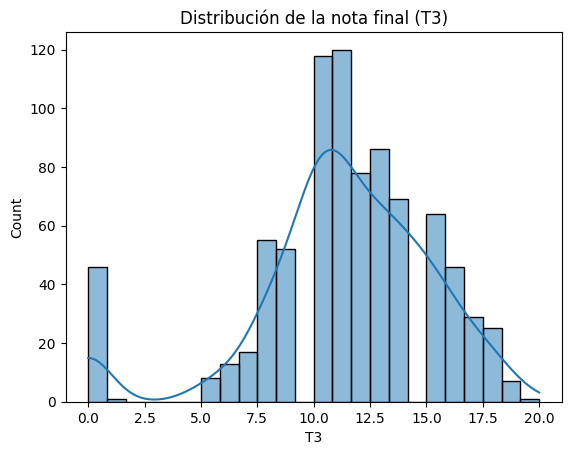

In [8]:
## Distribución del target
sns.histplot(df["T3"], kde=True)
plt.title("Distribución de la nota final (T3)")

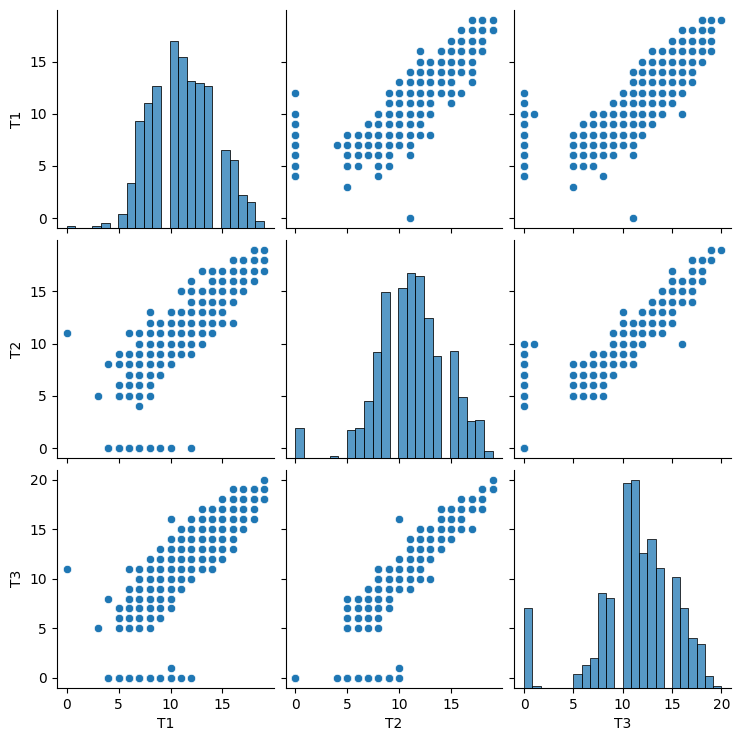

In [9]:
## Comparativa T1, T2 y T3
sns.pairplot(df[["T1", "T2", "T3"]])

<Axes: >

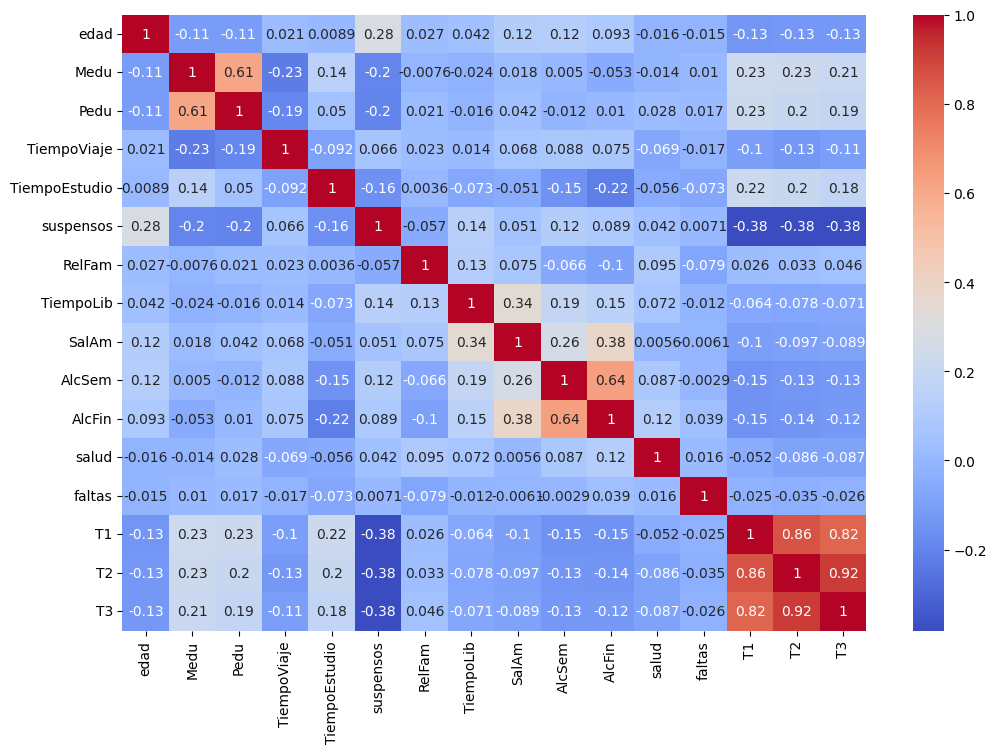

In [10]:
## Correlaciones numéricas
corr = df.select_dtypes(include="number").corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")

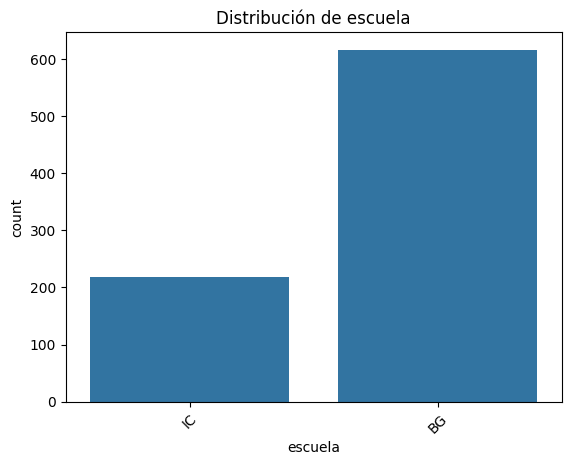

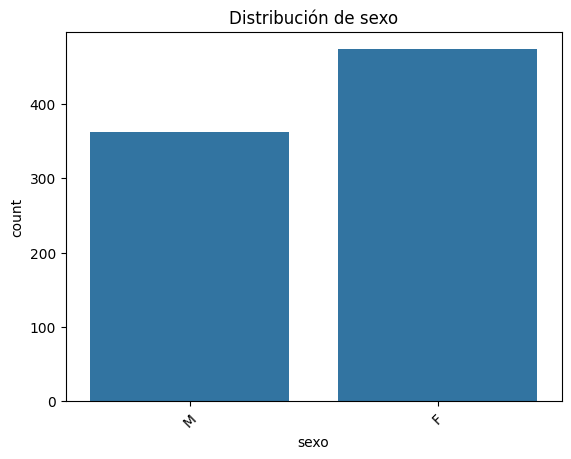

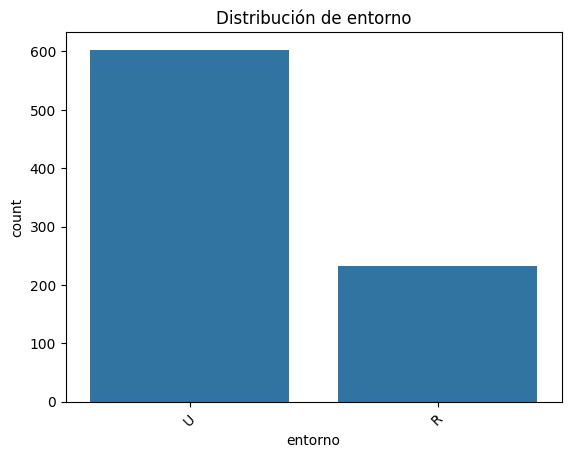

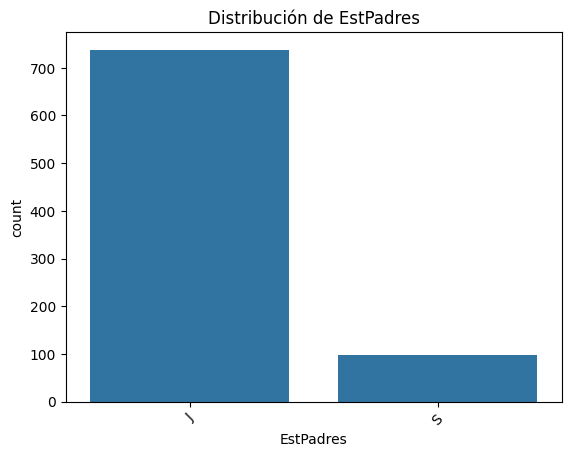

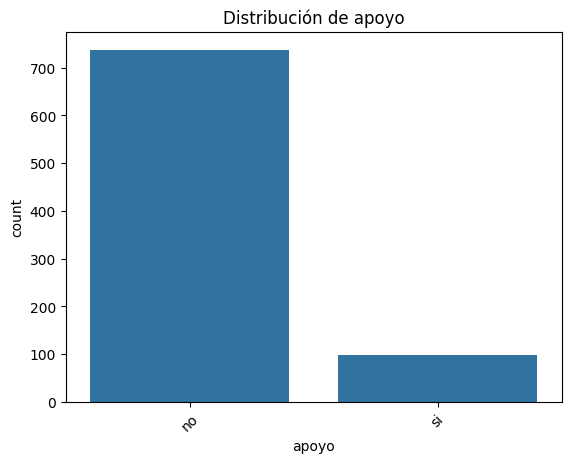

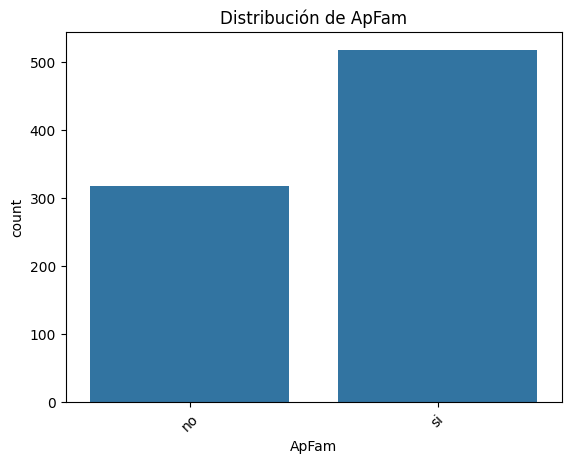

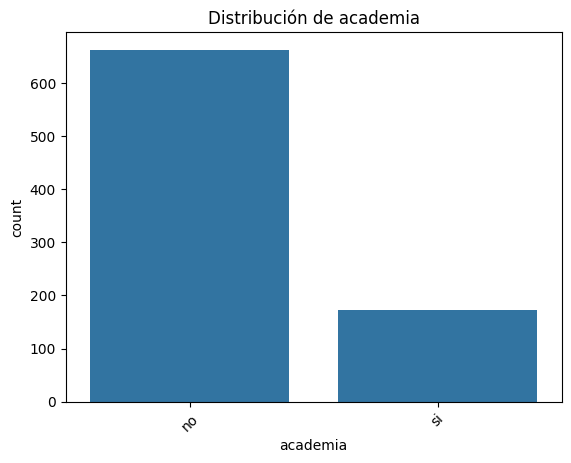

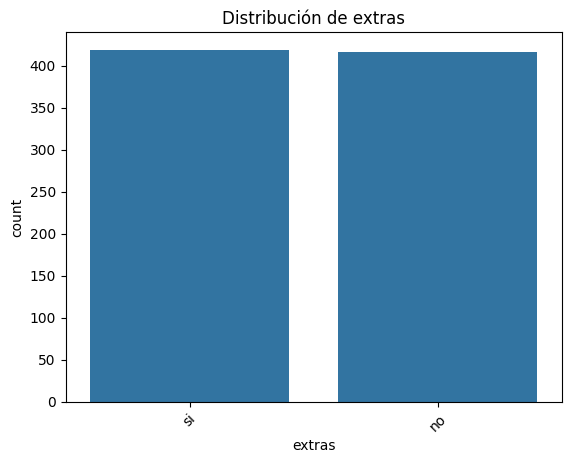

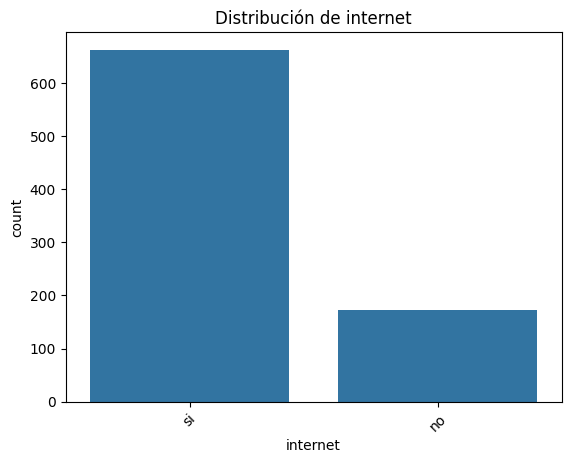

In [11]:
## Distribuciones categóricas
cat_vars = ["escuela", "sexo", "entorno", "EstPadres", "apoyo", "ApFam", "academia", "extras", "internet"]
for var in cat_vars:
    sns.countplot(data=df, x=var)
    plt.title(f"Distribución de {var}")
    plt.xticks(rotation=45)
    plt.show()

<Axes: xlabel='sexo', ylabel='T3'>

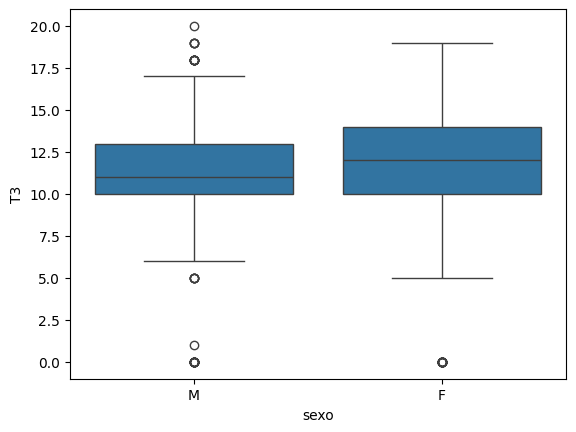

In [12]:
## Relación entre algunas variables y T3
sns.boxplot(data=df, x="sexo", y="T3")

<Axes: xlabel='apoyo', ylabel='T3'>

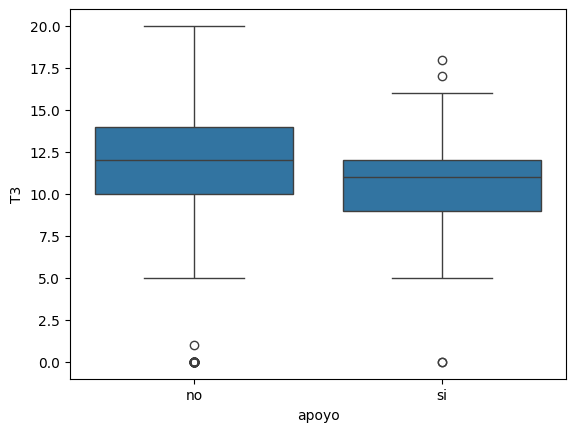

In [13]:
sns.boxplot(data=df, x="apoyo", y="T3")